In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import random

This jupyter notebook will allow you to visualize the data from the AJA Sputterer Logs

In [2]:
# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = r"C:\Users\jakeh\OneDrive\Desktop\Jake AJA Copy Folder\Datalog\20250625_S041_Ta_500W_815s_600C_25-Jun-25_ 2_03_23 PM.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, skiprows= 1)

# Will show what the dataframe looks like
print(df.head())
print(df.shape)


        Date        Time  Layer # Sub. Rot.  Sub. Rot. Speed  Sub. Z Height  \
0  25-Jun-25  2:03:23 PM        1       OFF                1           0.42   
1  25-Jun-25  2:03:25 PM        1       OFF                1           0.42   
2  25-Jun-25  2:03:27 PM        1       OFF                1           0.42   
3  25-Jun-25  2:03:29 PM        1       OFF                1           0.42   
4  25-Jun-25  2:03:31 PM        1       OFF                1           0.42   

   C.M. Press. VAT Press Mode  VAT Pos STPT VAT Pos Mode  ...  DC SWITCH POS  \
0         -0.1            OFF        1000.0          OFF  ...              1   
1         -0.1            OFF        1000.0          OFF  ...              1   
2         -0.1            OFF        1000.0          OFF  ...              1   
3         -0.1            OFF        1000.0          OFF  ...              1   
4         -0.1            OFF        1000.0          OFF  ...              1   

   DC#5 W Fdbk  DC#5 V Fdbk  DC#5 mA Fdbk  D

The different Available Variables to Plot are:
"Date,Time,Layer #,Sub. Rot.,Sub. Rot. Speed,Sub. Z Height,C.M. Press.,VAT Press Mode,VAT Pos STPT,VAT Pos Mode,Gas#1 Flow,Gas#1 STPT,Gas#2 Flow,Gas#2 STPT,Gas#3 Flow,Gas#3 STPT,Sub. Temp.,Sub. Temp. STPT,RF#1 W Fbdk,RF#1 DC Bias,RF#1 Plasma,RF#1 Shutter,RF#1 TGT,RF#1 KWH,RF#1 STPT,RF#2 W Fbdk,RF#2 DC Bias,RF#2 Plasma,RF#2 Shutter,RF#2 TGT,RF#2 KWH,RF#2 STPT,RF#3 W Fbdk,RF#3 DC Bias,RF#3 Plasma,RF#3 Shutter,RF#3 TGT,RF#3 KWH,RF#3 STPT,DC#1 W Fdbk,DC#1 V Fdbk,DC#1 mA Fdbk,DC#1 Plasma,DC#1 Shutter,DC#1 TGT,DC#1 KWH,DC#1 STPT,DC#1 MODE,DC#2 W Fdbk,DC#2 V Fdbk,DC#2 mA Fdbk,DC#2 Plasma,DC#2 Shutter,DC#2 TGT,DC#2 KWH,DC#2 STPT,DC#2 MODE,DC#3 W Fdbk,DC#3 V Fdbk,DC#3 mA Fdbk,DC#3 Plasma,DC#3 Shutter,DC#3 TGT,DC#3 KWH,DC#3 STPT,DC#3 MODE,DC SWITCH POS,DC#5 W Fdbk,DC#5 V Fdbk,DC#5 mA Fdbk,DC#5 Plasma,DC#5 Shutter,DC#5 TGT,DC#5 KWH,DC#5 STPT,DC#5 MODE"


In [3]:
color_palette = [
    'dodgerblue',
    'mediumseagreen',
    'goldenrod',
    'indianred',
    'slateblue',
    'tomato',
    'orchid',
    'darkcyan',
    'rosybrown',
    'steelblue',
    'coral',
    'darkorange',
    'limegreen',
    'sienna',
    'mediumvioletred',
    'peru',
    'teal',
    'cadetblue',
    'palevioletred',
    'darkkhaki'
]


[('2:03:23 PM', '2:03:35 PM'), ('2:03:35 PM', '2:36:20 PM'), ('2:36:22 PM', '2:39:32 PM'), ('2:39:33 PM', '2:40:37 PM'), ('2:40:39 PM', '3:08:07 PM'), ('3:08:09 PM', '3:16:26 PM'), ('3:16:27 PM', '3:21:34 PM'), ('3:21:36 PM', '3:29:19 PM'), ('3:29:21 PM', '3:43:31 PM'), ('3:43:33 PM', '5:39:58 PM')]


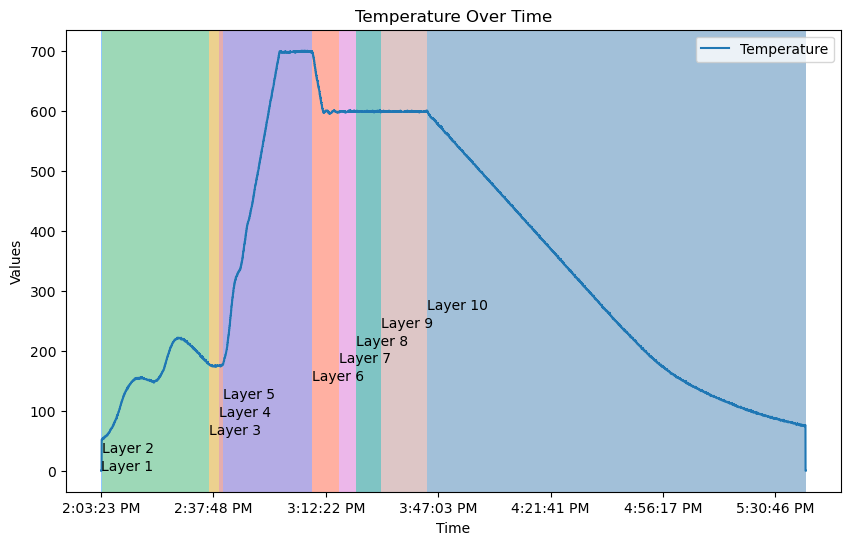

In [4]:
# 🎨 Create the plot
plt.figure(figsize=(10, 6))

# 📈 Plot Temperature vs. Time
plt.plot(df['Time'], df['Sub. Temp.'], label='Temperature', marker=',')


# 🧪 Add labels and title
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Values')

# 🗂️ Add a legend and grid
plt.legend()


layer_num = int(df['Layer #'].iloc[-1])
#colors = [list(matplotlib.colors.cnames.keys())[random.randint(0, len(matplotlib.colors.cnames.keys())-1)] for i in range(layer_num)]
assert layer_num < len(color_palette)
colors =[i for i in color_palette[0:layer_num]]

color_ranges = []
current_layer = 1
start = 0
end = 0
for i in range(len(df['Time'])):
    if df['Layer #'][i] > current_layer:
        color_ranges.append((df['Time'][start],df['Time'][end]))
        start = i
        end = start
        current_layer += 1
    elif i == len(df['Time']) -1:
        color_ranges.append((df['Time'][start],df['Time'][end]))
    else:
        end += 1 

print(color_ranges)
for i in range(len(color_ranges)):
    plt.axvspan(color_ranges[i][0], color_ranges[i][1], facecolor=colors[i], alpha=0.5, label = f"Layer {i+1}")
    plt.text(color_ranges[i][0], i*30, s = f"Layer {i+1}" )
    


plt.xticks(df['Time'][::1000])
# 📍 Show the plot
plt.show()


Dropdown(description='X-axis:', options=('Date', 'Time', 'Layer #', 'Sub. Rot.', 'Sub. Rot. Speed', 'Sub. Z He…

Dropdown(description='Y-axis:', options=('Date', 'Time', 'Layer #', 'Sub. Rot.', 'Sub. Rot. Speed', 'Sub. Z He…

Dropdown(description='Layer Start:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1)

Dropdown(description='Layer End:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), value=1)

Button(description='Plot', style=ButtonStyle())

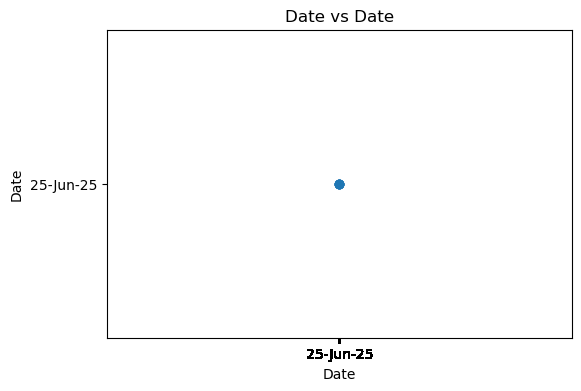

In [ ]:
from ipywidgets import interact, widgets
from IPython.display import display

# Sample DataFrame — you can replace this with your own

def get_layer_num():
    return int(df['Layer #'].iloc[-1])
def get_random_color_list():
    return  [list(matplotlib.colors.cnames.keys())[random.randint(0, len(matplotlib.colors.cnames.keys())-1)] for i in range(layer_num)]
def get_layer_range():
    layer_ranges = []
    current_layer = 1
    start = 0
    end = 0
    for i in range(len(df['Time'])):
        if df['Layer #'][i] > current_layer:
            layer_ranges.append((start, end))
            #layer_ranges.append((df['Time'][start],df['Time'][end]))
            start = i
            end = start
            current_layer += 1
        elif i == len(df['Time']) -1:
            layer_ranges.append((start, end))
        else:
            end += 1 
    return layer_ranges


# Dropdowns to select columns for x and y
x_dropdown = widgets.Dropdown(options=df.columns.tolist(), description='X-axis:')
y_dropdown = widgets.Dropdown(options=df.columns.tolist(), description='Y-axis:')
plot_button = widgets.Button(description='Plot')
layer_range_start_button = widgets.Dropdown(options = range(1, 1+ get_layer_num()), description = "Layer Start:")
layer_range_end_button = widgets.Dropdown(options = range(1, 1+ get_layer_num()), description = "Layer End:")

# Plot function
def plot_columns(x_col, y_col, start, end):
    layer_ranges = get_layer_range()
    if start == end:
        start_time = layer_ranges[start-1][0]
        end_time= layer_ranges[start-1][1]
    else:
        start_time = layer_ranges[start-1][0]
        end_time= layer_ranges[end-1][1]
    print((start, end), (start_time, end_time))
    plt.figure(figsize=(6, 4))
    plt.plot(df[x_col][start_time:end_time], df[y_col][start_time:end_time], marker='o')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col}')
    plt.grid(False)
    plt.xticks(df[x_col][::1000])
    plt.show()

# Callback for button
def on_plot_clicked(b):
    plot_columns(x_dropdown.value, y_dropdown.value, layer_range_start_button.value, layer_range_end_button.value)

plot_button.on_click(on_plot_clicked)

# Display widgets
display(x_dropdown, y_dropdown, layer_range_start_button, layer_range_end_button, plot_button)


In [ ]:

line = ""
with open(r"C:\Users\jakeh\OneDrive\Desktop\20250709_S050_400C_Ta_TaOx.ajp", "r") as f:
    line = f.readline()
my_list =line.split("\x00")
my_list = [i for i in my_list if len(i) > 3]

print(line)
print(my_list)


      20250628_L01_XY-13_Z-0pt42   *20250703_L04_NOHEAT-Ar-30-O2-20sccm-Pos275   ,20250703_L02_NOHEAT_02-30mT-50W-300s-OXIDIZE   '20250705_L03_200C_Ar_Clean-30W-30s-30mT   %20250703_L03_850C-0pt5Cramp_wait10min   +20250703_L05_850C_02-30mT-50W-30min-OXIDIZE   $20250709_L06_400C_0pt5Cramp_wait5min   +20250709_L05_400C-Ta-Strike-30W-30mT-Pos275   )20250709_L06_400C_Ta_Ramp-160W-3mT-Pos475   020250709_L07_400C_240nm-Ta-160W-2500s-3mT-Pos475   *20250709_L08_400C_02-30mT-50W-300s-OXIDIZE   -20250709_L10_400C_Ar-30sccm-Pos275-120s-FLUSH   20250628_L11_100C-RampDown   20250628_L12_END_Everything_OFF
['\x1a20250628_L01_XY-13_Z-0pt42', '*20250703_L04_NOHEAT-Ar-30-O2-20sccm-Pos275', ',20250703_L02_NOHEAT_02-30mT-50W-300s-OXIDIZE', "'20250705_L03_200C_Ar_Clean-30W-30s-30mT", '%20250703_L03_850C-0pt5Cramp_wait10min', '+20250703_L05_850C_02-30mT-50W-30min-OXIDIZE', '$20250709_L06_400C_0pt5Cramp_wait5min', '+20250709_L05_400C-Ta-Strike-30W-30mT-Pos275', ')20250709_L06_400C_Ta_Ramp-160W-3mT-Pos47

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import os

# 🔍 List files in a target directory (adjust path as needed)
target_folder = r"C:\Users\jakeh\OneDrive\Desktop\Jake AJA Copy Folder\Datalog"  # Change this to your folder path
file_list = [f for f in os.listdir(target_folder) if os.path.isfile(os.path.join(target_folder, f))]

# 🧭 Create dropdown to choose a file
file_dropdown = widgets.Dropdown(
    options=file_list,
    description='Select File:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# 🖥️ Button to confirm selection
load_button = widgets.Button(description='Load File')

# 📦 Output display
output = widgets.Output()

# 🧠 Handler for button click
def on_load_clicked(b):
    with output:
        output.clear_output()
        selected_file = file_dropdown.value
        file_path = os.path.join(target_folder, selected_file)
        print(f"Selected file: {selected_file}")
        
        # Optional: Read file into a DataFrame
        import pandas as pd
        df = pd.read_csv(file_path)
        print(df.head())

# 📎 Connect button click to handler
load_button.on_click(on_load_clicked)

# 🧱 Display widgets
display(file_dropdown, load_button, output)

Dropdown(description='Select File:', layout=Layout(width='50%'), options=('202401010_MPS011_Al_on_Silicon_10_1…

Button(description='Load File', style=ButtonStyle())

Output()